In [1]:
# -*- coding: utf-8 -*-
%matplotlib notebook

# Pomoc do listy nr 2

## 1. pakiet Astroquery (Vizquery przez Python-a)

### 1.1 Instrukcja instalacji:
#### Linux: pip install [--user] astroquery
#### Windows: python -m pip install [--user] astroquery

### 1.2 Przykłady użycia:

#### a) Importowanie danych o obiekcie z wybranego katalogu, za pomocą VizieR-a (https://astroquery.readthedocs.io/en/latest/vizier/vizier.html)

In [2]:
from astroquery.vizier import Vizier
result = Vizier.query_object("Sirius", catalog="GAIA")
print result

TableList with 6 tables:
	'0:I/324/igsl3' with 18 column(s) and 7 row(s) 
	'1:I/337/gaia' with 14 column(s) and 36 row(s) 
	'2:I/345/gaia2' with 32 column(s) and 50 row(s) 
	'3:I/347/gaia2dis' with 9 column(s) and 50 row(s) 
	'4:VI/137/gum_mw' with 17 column(s) and 50 row(s) 
	'5:VI/137/gum_gal' with 11 column(s) and 6 row(s) 


In [3]:
print result[1]    # wyświetla dane z katalogu I/337/gaia

   RA_ICRS     e_RA_ICRS    DE_ICRS     ...    e__FG_   __Gmag_      Var     
     deg          mas         deg       ...     e-/s      mag                
-------------- --------- -------------- ... ----------- ------- -------------
101.2975121288     0.484 -16.7442509181 ...       94.07  16.517 NOT_AVAILABLE
101.2929810929     0.684 -16.7317306305 ...         387  15.228 NOT_AVAILABLE
101.3149745369     0.331 -16.7345157488 ...       413.9  13.302 NOT_AVAILABLE
101.3037633154     0.269 -16.7223608014 ...       299.8  14.226 NOT_AVAILABLE
101.3028875918     0.209 -16.7291608798 ...       288.3  14.606 NOT_AVAILABLE
101.3217761411     0.096 -16.7175229181 ...       569.8  13.868 NOT_AVAILABLE
101.3121857929     0.380 -16.7109134127 ...       105.2  16.520 NOT_AVAILABLE
101.3177380736     0.105 -16.7170033714 ...        1016  13.052 NOT_AVAILABLE
101.3150164680     0.197 -16.7220182846 ...         132  15.596 NOT_AVAILABLE
101.2662442998     0.507 -16.7364517110 ...       89.92  16.898 

#### b) Pobieranie danych o obiekcie z SIMBAD-a (https://astroquery.readthedocs.io/en/latest/simbad/simbad.html)

In [4]:
from astroquery.simbad import Simbad

In [5]:
result_table = Simbad.query_object("SX Phe")

In [6]:
print result_table

 MAIN_ID        RA           DEC      ... COO_WAVELENGTH     COO_BIBCODE    
             "h:m:s"       "d:m:s"    ...                                   
--------- ------------- ------------- ... -------------- -------------------
V* SX Phe 23 46 32.8929 -41 34 54.770 ...              O 2018yCat.1345....0G


#### Aby wyświetlić, a potem dodać lub usunąć pokazywane kolumny należy użyć funkcji:

Simbad.list_votable_fields()    # wyświetla wszystkie dostępne kolumny

In [7]:
Simbad.get_votable_fields()             # aktualnie wyświetlane kolumny

['main_id', 'coordinates']

In [8]:
Simbad.add_votable_fields('flux(V)')    # dodaje jasność w filtrze V

In [9]:
Simbad.add_votable_fields('pm')         # dodaje ruch własny

In [10]:
star = Simbad.query_object('SX Phe')    # tworzy słownik o nazwie star z tym co zwróci Simbad

In [11]:
print star

 MAIN_ID        RA           DEC      ... PM_ERR_MAJA PM_ERR_MINA PM_ERR_ANGLE
             "h:m:s"       "d:m:s"    ...   mas / yr    mas / yr      deg     
--------- ------------- ------------- ... ----------- ----------- ------------
V* SX Phe 23 46 32.8929 -41 34 54.770 ...       0.064       0.073           90


In [12]:
print star.keys()                       # wszystkie słowa kluczowe słownika

['MAIN_ID', 'RA', 'DEC', 'RA_PREC', 'DEC_PREC', 'COO_ERR_MAJA', 'COO_ERR_MINA', 'COO_ERR_ANGLE', 'COO_QUAL', 'COO_WAVELENGTH', 'COO_BIBCODE', 'FLUX_V', 'PMRA', 'PMDEC', 'PM_ERR_MAJA', 'PM_ERR_MINA', 'PM_ERR_ANGLE']


In [13]:
print star['MAIN_ID'], star['MAIN_ID'].tolist()    # metoda .tolist() konwertuje wpis na listę

 MAIN_ID 
---------
V* SX Phe ['V* SX Phe']


## 2. Pakiet astropy

### 2.1 Instrukcja instalacji:
#### Linux: pip install [--user] astropy
#### Windows: python -m pip install [--user] astropy

### 2.2 Przykład czytania z pliku (http://docs.astropy.org/en/stable/io/ascii/index.html)

In [14]:
from astropy.io import ascii

In [15]:
all_data = ascii.read('stars.data')
all_data

col1,col2,col3,col4,col5,col6,col7,col8,col9
str3,str25,str3,str29,str7,str6,str15,str29,str4
---,-------------------------,---,-----------------------------,-------,------,---------------,-----------------------------,----
2,* eta UMa,PM*,13 47 32.43776 +49 18 47.7602,31.38,1.86,B3V,~ ~ ~,9
5,* bet Ori,s*b,05 14 32.27210 -08 12 05.8981,3.78,0.13,B8Iae,~ ~ ~,8
7,* bet Gem,PM*,07 45 18.94987 +28 01 34.3160,96.54,1.14,K0IIIb,~ ~ ~,10
8,* alf PsA,**,22 57 39.04625 -29 37 20.0533,129.81,1.16,A4V,~ ~ ~,9
9,* eps Ori,s*b,05 36 12.81335 -01 12 06.9089,1.65,1.69,B0Ia,~ ~ ~,10
10,* alf CMa,**,06 45 08.91728 -16 42 58.0171,379.21,-1.46,A1V+DA,~ ~ ~,8
12,* lam Sco,bC*,17 33 36.52012 -37 06 13.7648,5.71,1.62,B2IV+DA7.9,~ ~ ~,7
13,* eps UMa,a2*,12 54 01.74959 +55 57 35.3627,39.51,1.77,A1III-IVpkB9,~ ~ ~,10


### 2.3 Współrzędne i jednostki w astropy

In [16]:
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle       
from astropy import units as u                              # moduł obsługujący jednostki

In [17]:
radec = []
for i in all_data['col4'][1:]:
    radec.append(i)

In [18]:
c_icrs = SkyCoord(radec, unit=(u.hourangle, u.deg))         # obiekt przechowujący współrzędne równikowe
c_gal = c_icrs.galactic                                     # konwersja do współrzędnych galaktycznych

<IPython.core.display.Javascript object>


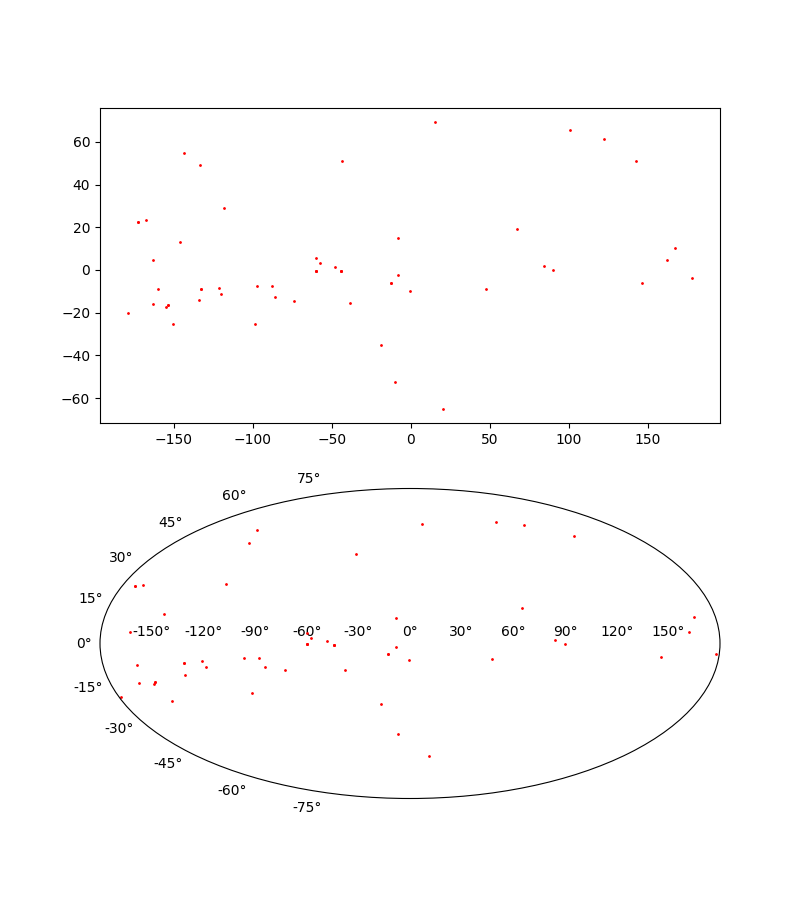

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,9))                             # tworzy figurę
ax1 = fig.add_subplot(211)                                  # dodaje pierwszy z wykresów na figurę
ax2 = fig.add_subplot(212, projection='aitoff')             # dodaje drugi z wykresów na figurę
ax1.plot(c_gal.l.wrap_at(180*u.deg), c_gal.b, 'or', ms = 1) # rysuje pierwszy wykres
for x, y in zip(c_gal.l.wrap_at(180*u.deg), c_gal.b):       # pętla do rysowania drugiego wykresu
    ax2.plot(x.rad, y.rad, 'or', ms = 1)